In [1]:
# import hierarchical clustering libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage 

In [2]:
Airlines = pd.read_csv("C:/Users/lenovo/Downloads/EastWestAirlines (1).csv")

In [3]:
Airlines.head(10)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


In [4]:
Airlines.shape

(3999, 12)

In [5]:
Airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
# Renaiming columns 
Airlines.columns = ['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles','Bonus_miles', 'Bonus_trans', 
                 'Flight_miles_12mo', 'Flight_trans_12','Days_since_enroll', 'Award'] 

In [7]:
Airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [8]:
# Normalization Function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [9]:
# Normalized data frame (considering the numerical part of data)
Df_norm = norm_func(Airlines.iloc[:,1:])

In [10]:
Df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


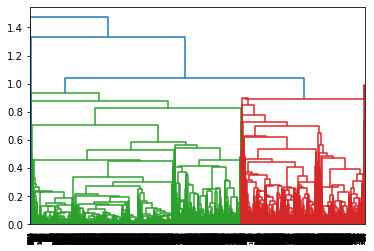

In [11]:
# Create Dendrogram
Dendogram = sch.dendrogram(sch.linkage(Df_norm, method='centroid'))

In [12]:
linkage(Df_norm, method="complete",metric="euclidean")

array([[3.37000000e+03, 3.87600000e+03, 0.00000000e+00, 2.00000000e+00],
       [3.70400000e+03, 3.72900000e+03, 2.99211023e-04, 2.00000000e+00],
       [2.21500000e+03, 2.22000000e+03, 3.07899725e-04, 2.00000000e+00],
       ...,
       [7.98800000e+03, 7.99100000e+03, 1.96828291e+00, 1.46900000e+03],
       [7.99300000e+03, 7.99400000e+03, 2.18401946e+00, 3.99500000e+03],
       [7.96900000e+03, 7.99500000e+03, 2.30780192e+00, 3.99900000e+03]])

In [13]:
# create clusters
HC = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')

In [14]:
y_HC = HC.fit

In [15]:
Df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [16]:
Df_norm.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,0.043172,0.012927,0.264879,0.007252,0.003063,0.065020,0.134906,0.014929,0.025917,0.496330,0.370343
std,0.059112,0.069399,0.344230,0.073825,0.048810,0.091590,0.111672,0.045436,0.071569,0.248991,0.482957
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010868,0.000000,0.000000,0.000000,0.000000,0.004741,0.034884,0.000000,0.000000,0.280685,0.000000
50%,0.025279,0.000000,0.000000,0.000000,0.000000,0.027195,0.139535,0.000000,0.000000,0.493610,0.000000
75%,0.054201,0.000000,0.500000,0.000000,0.000000,0.090261,0.197674,0.010092,0.018868,0.697914,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
Airlines.isna().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [18]:
Airlines.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


<AxesSubplot:>

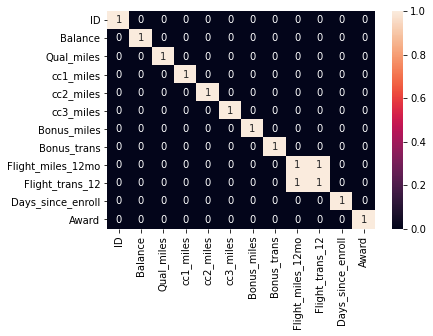

In [19]:
sns.heatmap(Airlines.corr()>0.85, annot=True)

In [20]:
# Data Preprocessing
Airlines1 =  Airlines.drop(['ID','Award'], axis=1)
Airlines1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935


In [21]:
# Standardization
from sklearn.preprocessing import StandardScaler
std_df = StandardScaler().fit_transform(Airlines1)
std_df.shape

(3999, 10)

In [22]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

In [23]:
minmax_df = minmax.fit_transform(Airlines1)
minmax_df.shape

(3999, 10)

# PCA

In [24]:
from sklearn.decomposition import PCA
pca_std = PCA(random_state=10, n_components=0.95)
pca_std_df= pca_std.fit_transform(std_df)


In [25]:
print(pca_std.singular_values_)

[110.44189995  83.11377294  64.82616793  63.48944763  61.96605949
  60.17942085  51.82140955  38.09870033]


In [26]:
print(pca_std.explained_variance_ratio_*100)

[30.50115845 17.27406665 10.5087073  10.07979485  9.60188179  9.05617078
  6.71532505  3.62968484]


In [27]:
cum_variance = np.cumsum(pca_std.explained_variance_ratio_*100)
cum_variance

array([30.50115845, 47.7752251 , 58.28393239, 68.36372724, 77.96560903,
       87.02177981, 93.73710486, 97.3667897 ])

In [28]:
from sklearn.decomposition import PCA
pca_minmax =  PCA(random_state=10, n_components=0.95)
pca_minmax_df = pca_minmax.fit_transform(minmax_df)

In [29]:
print(pca_minmax.singular_values_)

[23.30644253 14.98078096  6.73641543  4.71018421  4.35528647]


In [30]:
print(pca_minmax.explained_variance_ratio_*100)

[60.47067269 24.98398618  5.05185116  2.46983879  2.11167109]


# K-Means Clustering

In [31]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np

In [32]:
Airlines.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [33]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Airlines_df = scaler.fit_transform(Airlines.iloc[:,1:])

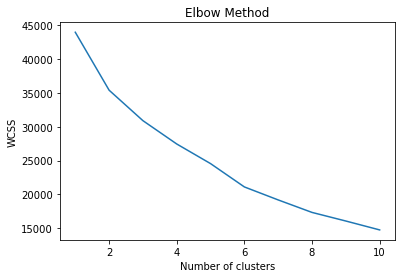

In [34]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_Airlines_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [35]:
wcss

[43988.99999999999,
 35409.51145242439,
 30899.246824652193,
 27446.372456681365,
 24541.32958204577,
 21089.97362892965,
 19165.861458655658,
 17316.866446128286,
 16043.4062423095,
 14726.983322766795]

In [36]:
# Build Cluster Algorithm
from sklearn.cluster import KMeans
Clusters_New=KMeans(4)
Clusters_New.fit(scaled_Airlines_df)

KMeans(n_clusters=4)

In [37]:
Clusters_New.labels_

array([1, 1, 1, ..., 2, 1, 1])

In [38]:
Airlines['Clusterid_New'] = Clusters_New.labels_

In [39]:
Clusters_New.cluster_centers_

array([[ 1.19930860e+00,  1.02758112e+00,  1.04575116e-01,
         1.38046790e-01, -6.27665798e-02,  6.25951749e-01,
         1.56054548e+00,  3.42709017e+00,  3.68477621e+00,
         2.85274660e-01,  9.18646074e-01],
       [-2.98748917e-01, -6.42142013e-02, -6.14321497e-01,
         3.28947498e-02, -6.07426678e-02, -5.18324114e-01,
        -4.91372184e-01, -1.85214810e-01, -1.97781208e-01,
        -2.07878651e-01, -3.48824498e-01],
       [ 4.21746010e-01, -1.01103166e-02,  1.18776700e+00,
        -8.23786348e-02, -5.47688882e-02,  9.02825341e-01,
         7.41241194e-01, -9.45981390e-02, -1.04678145e-01,
         3.69614002e-01,  5.61908485e-01],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
         1.71461374e+00,  3.32926913e-02,  5.96953922e-02,
         2.39872612e-01,  3.37527346e-01]])

In [40]:
Airlines.groupby('Clusterid_New').agg(['mean']).reset_index()

,Clusterid_New,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1722.906977,194447.337209,939.017442,2.203488,1.034884,1.000000,32260.296512,26.587209,5258.098837,15.348837,4707.616279,0.813953
1,1,2246.276461,43530.202607,94.403239,1.214455,1.019352,1.000395,4636.149684,6.886256,200.669431,0.623223,3688.845972,0.201817
2,2,1600.295312,116091.697656,136.400000,3.695312,1.002344,1.001562,38957.671875,18.723437,327.871094,0.977344,4883.627344,0.642188
3,3,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


In [41]:
Airlines

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusterid_New
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [44]:
# Create Clusters (y)
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(n_clusters=5)

In [45]:
y=pd.DataFrame(hclusters.fit_predict(Df_norm),columns=['clustersid'])
y['clustersid'].value_counts()

1    1011
0     946
2     808
4     699
3     535
Name: clustersid, dtype: int64

In [46]:
# Adding clusters to dataset
Airlines1['clustersid']=hclusters.labels_
Airlines1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clustersid
0,28143,0,1,1,1,174,1,0,0,7000,1
1,19244,0,1,1,1,215,2,0,0,6968,1
2,41354,0,1,1,1,4123,4,0,0,7034,1
3,14776,0,1,1,1,500,1,0,0,6952,1
4,97752,0,4,1,1,43300,26,2077,4,6935,3
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,0
3995,64385,0,1,1,1,981,5,0,0,1395,0
3996,73597,0,3,1,1,25447,8,0,0,1402,0
3997,54899,0,1,1,1,500,1,500,1,1401,4


In [47]:
Airlines1.groupby('clustersid').agg(['mean']).reset_index()

,clustersid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,79848.233615,285.097252,1.699789,1.024313,1.000000,12079.774841,12.133192,781.939746,2.369979,4372.173362
1,1,43313.653808,21.506429,1.000000,1.033630,1.000989,2562.614243,5.474777,169.510386,0.523244,4940.680514
2,2,106221.111386,161.262376,3.198020,1.001238,1.025990,26458.257426,16.363861,198.733911,0.558168,4367.250000
3,3,127475.028037,160.801869,4.362617,1.000000,1.050467,58656.919626,22.235514,991.110280,3.005607,5072.226168
4,4,30013.416309,98.054363,1.000000,1.000000,1.000000,2552.569385,6.101574,340.274678,0.948498,1568.864092


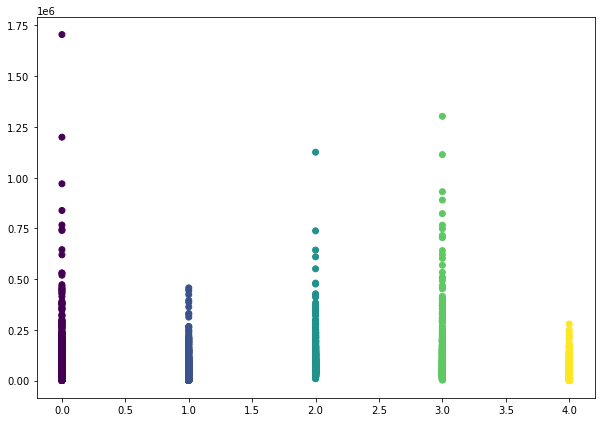

In [50]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(Airlines1['clustersid'],Airlines1['Balance'], c=hclusters.labels_)